In [359]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import datetime
import pandas as pd
from tqdm import tqdm_notebook
from pdf2image import convert_from_path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,StratifiedKFold, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [289]:
path='../Florent/Documents/MANON/TABLEUR ANONYME_1.xlsx'
patients_X = pd.read_excel(path)
patients_X.head()

,Numero_participant,Date_V1,Date_naissance,Sexe,LenkeA,LenkeB,LenkeC,LenkeD,V1_corset,V1_poids,...,V2_rx_lord,V3_M1_rx_cobb_thoracic,V3_M1_rx_cobb_thoracolombar,V3_M1_rx_cobb_lombar,V3_SURF_thoracic,V3_SURF_thoracolombar,V3_SURF_lombar,V3_rx_sag,V3_rx_cyph,V3_rx_lord
0,4,2015-09-09,2002-09-30,1,0,0,1,0,1.0,59.0,...,60.0,NaN,18.8,NaN,NaN,172.5,46.0,7.5,31.0,57.0
1,1,2015-09-09,2002-01-10,1,0,0,1,0,1.0,49.0,...,54.0,NaN,NaN,14.00,101.5,62.0,28.5,8.0,36.0,45.0
2,5,2015-09-09,2005-04-15,1,0,0,1,0,1.0,28.0,...,31.0,NaN,NaN,10.75,235.0,NaN,NaN,7.0,40.0,33.0
3,2,2015-09-09,2005-03-26,1,0,0,0,1,1.0,42.0,...,46.8,22.5,NaN,35.50,99.0,NaN,121.0,5.0,17.0,42.0
4,3,2015-09-09,2002-02-27,1,0,0,1,0,0.0,42.0,...,49.1,NaN,NaN,26.00,78.5,207.5,49.0,11.0,43.0,54.0


In [290]:
exams_X=pd.read_csv('exams_X.csv', index_col=0)

# We create the function to turn the date into the right format
def formatdate(x):
   return datetime.datetime.strptime(x, '%Y-%m-%d').date()
exams_X['exam_date']=exams_X['exam_date'].apply(formatdate)
exams_X.head()

,path,exam_date,symetry_axis,x_difference_scapulas,x_offset_scapulas,y_difference_scapulas,z_difference_scapulas,y_scapulas_creux_du_dos,z_scapulas_creux_du_dos,average_dif_l_r_thoracic_close,average_dif_l_r_thoracolombar_close,average_dif_l_r_lombar_close,average_dif_l_r_thoracic_far,average_dif_l_r_thoracolombar_far,average_dif_l_r_lombar_far,id_patient
0,../Florent/Documents/MANON/biomod PATIENTS/1. ...,2015-09-09,316.0,185.0,12.0,-17.0,3.0,238.0,-6.0,1.936728,-0.136670,0.543408,0.435402,-0.924247,0.460078,1.0
1,../Florent/Documents/MANON/biomod PATIENTS/1. ...,2016-03-16,315.0,197.0,5.0,-11.0,2.0,212.0,-5.0,0.990796,-0.048920,0.746495,0.157050,-0.393157,0.577530,1.0
2,../Florent/Documents/MANON/biomod PATIENTS/1. ...,2016-03-16,301.0,195.0,-9.0,-7.0,-1.0,212.0,-6.0,-0.462396,-1.601169,-1.201919,-0.123209,-0.312752,0.639937,1.0
3,../Florent/Documents/MANON/biomod PATIENTS/1. ...,2017-02-22,325.0,194.0,-13.0,-55.0,1.0,221.0,-5.0,0.890184,-1.354921,-0.016909,0.542287,-0.852690,0.535544,1.0
4,../Florent/Documents/MANON/biomod PATIENTS/1. ...,2017-02-22,326.0,191.0,-13.0,-59.0,1.0,216.0,-4.0,0.846840,-1.439667,-0.195570,0.537808,-0.865806,0.446961,1.0


In [291]:
# #Let's look at the pictures 1 by 1
# for i in exams_X.index.values:
#     #open the pdf as an image
#     pages = convert_from_path(exams_X['path'][i],285)
#     # We crop the colored level image zone
#         # Define box inside image
#     left = 125
#     top = 1380
#     width = 640
#     height = 750
#         # Create Box
#     box = (left, top, left+width, top+height)
#         # Crop Image
#     area = pages[0].crop(box)
#     #Display image
#     yrange=range(height)
#     xrange=range(width)
#     x_sym=exams_X['symetry_axis'][i]
#     scapula_gap=exams_X['x_difference_scapulas'][i]
#     x= np.zeros(height, dtype=np.int)
#     x.fill(x_sym)
#     x1= x-int(scapula_gap*0.75)
#     x2= x-int(scapula_gap/2)
#     x3= x+int(scapula_gap*0.75)
#     x4= x+int(scapula_gap/2)
#     figure(figsize=(16, 12))
#     imgplot = plt.imshow(area)
#     plt.scatter(x=x, y=yrange, c='b', s=3)
#     plt.scatter(x=x1, y=yrange, c='b', s=3)
#     plt.scatter(x=x2, y=yrange, c='b', s=3)
#     plt.scatter(x=x3, y=yrange, c='b', s=3)
#     plt.scatter(x=x4, y=yrange, c='b', s=3)
#     plt.show()
#     pressed_key=input("Press s to delete, e to exit or Enter to continue")
#     if pressed_key=='s':
#         exams_X.drop([i], inplace=True)
#     elif pressed_key=='e':
#         break
# exams_X.reset_index(drop=True,inplace=True)

(array([ 2.,  0.,  1.,  0.,  0.,  3.,  6.,  5.,  8., 10., 20., 28., 60.,
        63., 58., 69., 57., 45., 24., 23.,  3.,  6.,  3.,  9.,  0.,  2.,
         3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([-2.22988863, -2.07577896, -1.9216693 , -1.76755963, -1.61344997,
        -1.4593403 , -1.30523063, -1.15112097, -0.9970113 , -0.84290164,
        -0.68879197, -0.5346823 , -0.38057264, -0.22646297, -0.07235331,
         0.08175636,  0.23586603,  0.38997569,  0.54408536,  0.69819503,
         0.85230469,  1.00641436,  1.16052402,  1.31463369,  1.46874336,
         1.62285302,  1.77696269,  1.93107235,  2.08518202,  2.23929169,
         2.39340135,  2.54751102,  2.70162068,  2.85573035,  3.00984002,
         3.16394968,  3.31805935,  3.47216901,  3.62627868]),
 <a list of 38 Patch objects>)

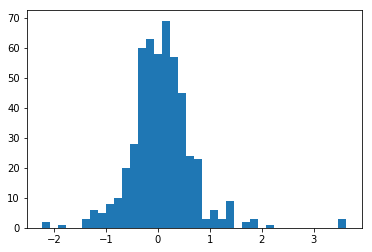

In [297]:
plt.hist(exams_X['average_dif_l_r_lombar_close'], bins='auto')

In [296]:
#remove a few outliers
exams_X.drop(exams_X[exams_X.x_difference_scapulas < 150].index, inplace=True)
exams_X.drop(exams_X[exams_X.x_difference_scapulas >300].index, inplace=True)
exams_X.drop(exams_X[exams_X.y_scapulas_creux_du_dos < 150].index, inplace=True)
exams_X.drop(exams_X[exams_X.y_scapulas_creux_du_dos >420].index, inplace=True)
exams_X.reset_index(drop=True,inplace=True)

In [298]:
#We fill the exam rows with the right data
for i in exams_X.index.values:
    patient=patients_X.loc[patients_X['Numero_participant'] == exams_X['id_patient'][i]]
    if len(patient)!=1:
        exams_X.drop([i], inplace=True)
    else:
        exams_X.loc[i, 'Date_naissance'] = patient['Date_naissance'].iloc[0]
        exams_X.loc[i, 'Sexe'] = patient['Sexe'].iloc[0]
        exams_X.loc[i, 'LenkeA'] = patient['LenkeA'].iloc[0]
        exams_X.loc[i, 'LenkeB'] = patient['LenkeB'].iloc[0]
        exams_X.loc[i, 'LenkeC'] = patient['LenkeC'].iloc[0]
        exams_X.loc[i, 'LenkeD'] = patient['LenkeD'].iloc[0]
        for j in range(1,5):
            if j==4:
                exams_X.drop([i], inplace=True)
            elif patient[f'Date_V{j}'].iloc[0].date()==exams_X['exam_date'][i]:
                exams_X.loc[i, 'corset'] = patient[f'V{j}_corset'].iloc[0]
                exams_X.loc[i, 'poids'] = patient[f'V{j}_poids'].iloc[0]
                exams_X.loc[i, 'taille'] = patient[f'V{j}_taille'].iloc[0]
                exams_X.loc[i, 'M1_rx_cobb_thoracic'] = patient[f'V{j}_M1_rx_cobb_thoracic'].iloc[0]
                exams_X.loc[i, 'M1_rx_cobb_thoracolombar'] = patient[f'V{j}_M1_rx_cobb_thoracolombar'].iloc[0]
                exams_X.loc[i, 'M1_rx_cobb_lombar'] = patient[f'V{j}_M1_rx_cobb_lombar'].iloc[0]
                exams_X.loc[i, 'SURF_thoracic'] = patient[f'V{j}_SURF_thoracic'].iloc[0]
                exams_X.loc[i, 'SURF_thoracolombar'] = patient[f'V{j}_SURF_thoracolombar'].iloc[0]
                exams_X.loc[i, 'SURF_lombar'] = patient[f'V{j}_SURF_lombar'].iloc[0]
                exams_X.loc[i, 'rx_sag'] = patient[f'V{j}_rx_sag'].iloc[0]
                exams_X.loc[i, 'rx_cyph'] = patient[f'V{j}_rx_cyph'].iloc[0]
                exams_X.loc[i, 'rx_lord'] = patient[f'V{j}_rx_lord'].iloc[0]
                break
exams_X.reset_index(drop=True,inplace=True)
# exams_X.head()


In [337]:
#Now we create the data to model: for each patient we compute the differences between exams
X = pd.DataFrame(dtype=np.float64)
Y = pd.DataFrame(dtype=np.float64)
k=0
for i in exams_X['id_patient'].unique():
    exams=exams_X.loc[exams_X['id_patient'] == i]
    if len(exams)>1:
        for indx, a in enumerate(exams.index[:-1]):
            for b in exams.index[indx+1:]:
                if exams_X['exam_date'][a]<exams_X['exam_date'][b]:
                    first_index=a
                    second_index=b
                else:
                    first_index=b
                    second_index=a
                for feat in exams_X.columns.values[3:15]:
                    X.loc[k, 'diff_'+feat]=exams_X[feat][second_index]-exams_X[feat][first_index]
                X.loc[k, 'initial_age']=(exams_X['exam_date'][first_index]-exams_X['Date_naissance'][first_index].date()).days
                for feat in exams_X.columns.values[17:22]:
                    X.loc[k, feat]=exams_X[feat][first_index]
                if exams_X['corset'][first_index]==exams_X['corset'][second_index]:
                    X.loc[k, 'corset_arrete']=0
                    if exams_X['corset'][first_index]==0:
                        X.loc[k, 'corset_continu']=1
                    else:
                        X.loc[k, 'corset_continu']=0
                else:
                    X.loc[k, 'corset_continu']=0
                    X.loc[k, 'corset_arrete']=1
                for feat in exams_X.columns.values[23:25]:
                    X.loc[k, 'diff_'+feat]=exams_X[feat][second_index]-exams_X[feat][first_index]
                for feat in exams_X.columns.values[28:31]:
                    X.loc[k, 'diff_'+feat]=exams_X[feat][second_index]-exams_X[feat][first_index]
#                 for feat in exams_X.columns.values[25:28]:
#                     exams_X[feat].fillna(0, inplace=True)
#                     Y.loc[k, 'diff_'+feat]=exams_X[feat][second_index]-exams_X[feat][first_index]
                for feat in exams_X.columns.values[25:28]:
                    exams_X[feat].fillna(0, inplace=True)
                    difference=exams_X[feat][second_index]-exams_X[feat][first_index]
                    Y.loc[k, 'diff_'+feat]=difference>5 or (exams_X[feat][first_index]==0 and exams_X[feat][second_index]>0)
                for feat in exams_X.columns.values[31:]:
                    exams_X[feat].fillna(0, inplace=True)
                    Y.loc[k, 'diff_'+feat]=exams_X[feat][second_index]-exams_X[feat][first_index]
                k+=1

In [308]:
#Define folds and parameters

n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
scaler = StandardScaler()

['diff_x_difference_scapulas' 'diff_x_offset_scapulas'
 'diff_y_difference_scapulas' 'diff_z_difference_scapulas'
 'diff_y_scapulas_creux_du_dos' 'diff_z_scapulas_creux_du_dos'
 'diff_average_dif_l_r_thoracic_close'
 'diff_average_dif_l_r_thoracolombar_close'
 'diff_average_dif_l_r_lombar_close' 'diff_average_dif_l_r_thoracic_far'
 'diff_average_dif_l_r_thoracolombar_far'
 'diff_average_dif_l_r_lombar_far' 'initial_age' 'Sexe' 'LenkeA' 'LenkeB'
 'LenkeC' 'LenkeD' 'corset_arrete' 'corset_continu' 'diff_poids'
 'diff_taille' 'diff_SURF_thoracic' 'diff_SURF_thoracolombar'
 'diff_SURF_lombar']


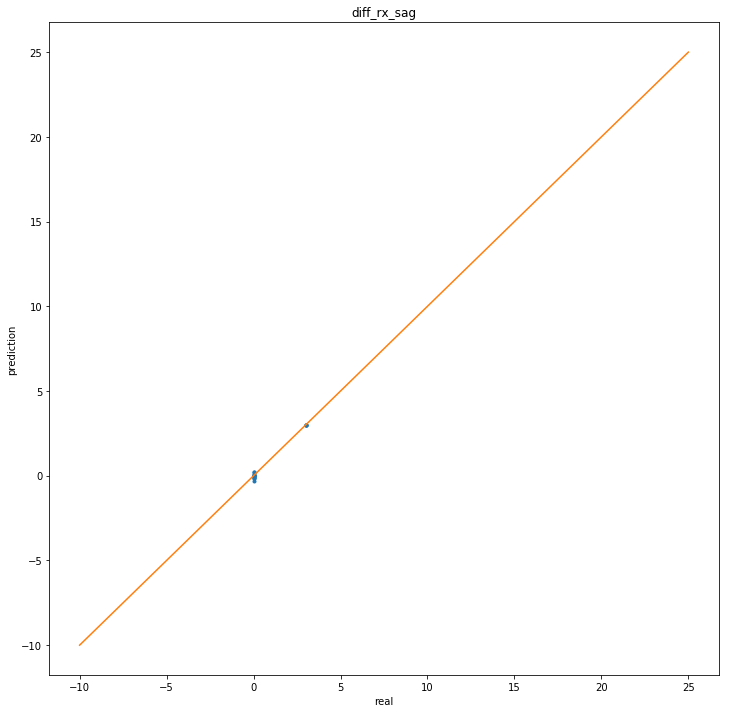

In [366]:
#This is for regression... I comment it because the new model is for classification

#Now we build the models for each y
for yfeature in Y.columns.values[3:4]:
    
    #First we keep only the rows where we have a value for y
    y=Y[yfeature].loc[~Y[yfeature].isna()].copy()
    x=X.loc[~Y[yfeature].isna()].copy()
    
    #Then we remove the x columns with a lot of NaN
    for xfeature in x.columns.values:
        if x[xfeature].isna().sum()>1000:
            x.drop([xfeature], axis=1,inplace=True)
    #And we remove the rows with the remaining NaNs
        elif x[xfeature].isna().sum()!=0:
            y=y.loc[~x[xfeature].isna()].copy()
            x=x.loc[~x[xfeature].isna()].copy()
    print(X.columns.values)
    
    #We scale x
    scaler.fit(x)
    scaled_x = pd.DataFrame(scaler.transform(x), columns=x.columns)
    
    #Then we run the model
    oof = np.zeros(len(scaled_x))
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(scaled_x,y)):
        X_tr, X_val = scaled_x.iloc[trn_idx], scaled_x.iloc[val_idx]
        y_tr, y_val = y.iloc[trn_idx], y.iloc[val_idx]
        #create and run model
        model=LinearRegression()
        model.fit(X_tr,y_tr)
        oof[val_idx] = model.predict(X_val)
        
    # plot prediction and actual data
    figure(figsize=(12, 12))
    plt.xlabel('real')
    plt.ylabel('prediction')
    plt.title(yfeature)
    plt.plot(y, oof, '.')
    # plot a line, a perfit predict would all fall on this line
    x = np.linspace(-10, 25, 100)
    y = x
    plt.plot(x, y)
    plt.show()

    
    break

In [371]:
#This is for regression... I comment it because the new model is for classification

#Now we build the models for each y
for yfeature in Y.columns.values[:3]:
    
    #First we keep only the rows where we have a value for y
    y=Y[yfeature].loc[~Y[yfeature].isna()].copy()
    y=y.astype('int')
    x=X.loc[~Y[yfeature].isna()].copy()
    
    #Then we remove the x columns with a lot of NaN
    for xfeature in x.columns.values:
        if x[xfeature].isna().sum()>20:
            x.drop([xfeature], axis=1,inplace=True)
    #And we remove the rows with the remaining NaNs
        elif x[xfeature].isna().sum()!=0:
            y=y.loc[~x[xfeature].isna()].copy()
            x=x.loc[~x[xfeature].isna()].copy()
    
    #We scale x
    scaler.fit(x)
    scaled_x = pd.DataFrame(scaler.transform(x), columns=x.columns)
    
    #Then we run the model
    oof = np.zeros(len(scaled_x))
    feature_importance_df = pd.DataFrame()
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(scaled_x,y)):
        X_tr, X_val = scaled_x.iloc[trn_idx], scaled_x.iloc[val_idx]
        y_tr, y_val = y.iloc[trn_idx], y.iloc[val_idx]
        #create and run model
        model=DecisionTreeClassifier(random_state=42)
        model.fit(X_tr,y_tr)
        oof[val_idx] = model.predict(X_val)
        #feature importance
        train_columns = scaled_x.columns.values
        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = train_columns
        fold_importance_df["importance"] = model.feature_importances_[:len(train_columns)]
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
    print(yfeature)
    print(confusion_matrix(y, oof))
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    print(f'specificity:{specificity}')
    print(f'sensitivity:{sensitivity}\n')

diff_M1_rx_cobb_thoracic
[[541  18]
 [ 19  94]]
specificity:0.9788273615635179
sensitivity:0.7586206896551724

diff_M1_rx_cobb_thoracolombar
[[609  15]
 [ 19  29]]
specificity:0.9788273615635179
sensitivity:0.7586206896551724

diff_M1_rx_cobb_lombar
[[601  13]
 [ 14  44]]
specificity:0.9788273615635179
sensitivity:0.7586206896551724



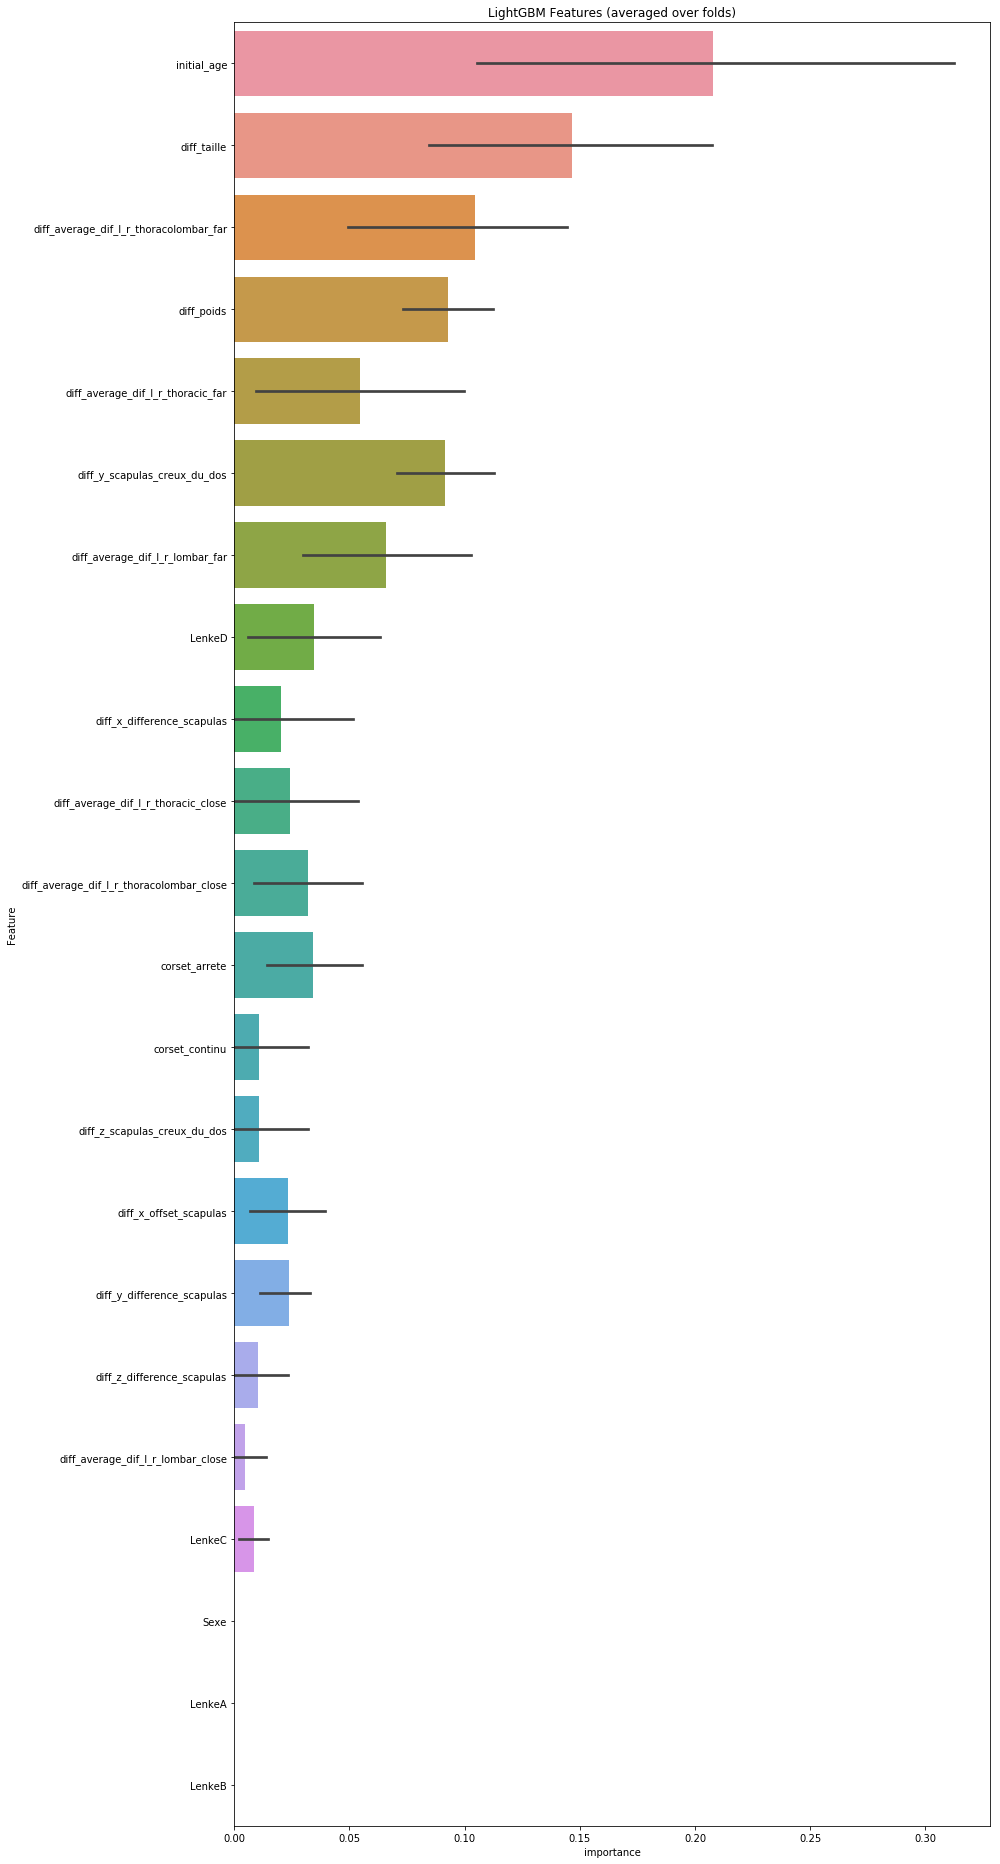

In [360]:
#Print the features importance

cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

# feature_importance_df[["Feature", "importance"]].groupby("Feature").mean().sort_values(by="importance", ascending=False)[:150].index

In [365]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

InvocationException: GraphViz's executables not found